In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

# K-Means

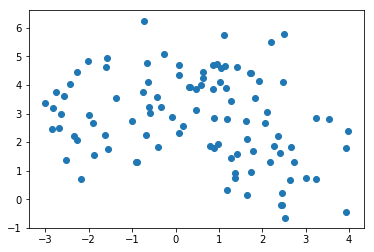

In [119]:
X, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.brg)
plt.show()

Let's implement K-Means, a simple algorithm for clustering. This is done as follows.

- Initialization - take k random points in the data and use them as initial cluster centroids.

- For each point in the dataset, compute its distance to each of the centroids, and assign the point to a cluster ID corresponding to the closest centroid.

- Using these new cluster assignments, compute the new cluster centroids.

- Repeat steps 2 and 3 till the centroids converge (previous centroids == new centroids), and return the cluster IDs.

In [117]:
import random
import statistics 
def kmeans(X, k):
    cluster_Indexes = random.sample(range(len(X)-1), k)
    prevCentroids = [(X[key]).tolist() for key in cluster_Indexes]
    centroids = []
    cluster_Indexes = range(k)
    while prevCentroids != centroids:
        cluster_ids1=[0]*len(X)
        centroids = prevCentroids
        cluster_ids = {key: [] for key in cluster_Indexes}
        for index,datapoint in enumerate(X):
                minDistance = squaredDistanceBetweenPoints(X[index],centroids[cluster_Indexes[0]])
                assignedClusterId = 0
                for centroidIndex in cluster_ids:
                    distance = squaredDistanceBetweenPoints(X[index],centroids[centroidIndex])
                    if minDistance > distance:
                        assignedClusterId = centroidIndex
                        minDistance = distance
                cluster_ids[assignedClusterId] = cluster_ids[assignedClusterId] + [datapoint]
                cluster_ids1[index] = assignedClusterId
        prevCentroids = [(sum(cluster_ids[key])/len(cluster_ids[key])).tolist() for key in cluster_Indexes]
        sorted(prevCentroids)
    cluster_ids = cluster_ids1
    centroids = np.array(prevCentroids)
    return centroids, cluster_ids

def squaredDistanceBetweenPoints(X1,X2):
    return (X1[0]-X2[0])**2 + (X1[1]-X2[1])**2 

Let's find 3 clusters for the input data using the above K-Means function.

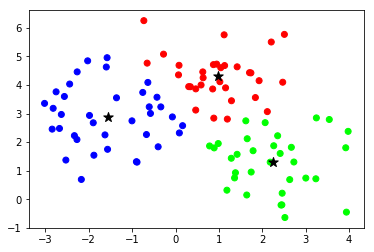

In [132]:
centroids, cluster_ids = kmeans(X,3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_ids, cmap=plt.cm.brg)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=100, marker = '*')
plt.show()

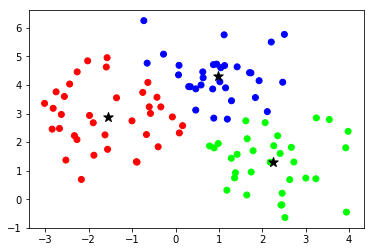

In [133]:
estimator = KMeans(n_clusters=3)
cluster_ids = estimator.fit_predict(X)
centroids = estimator.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=cluster_ids, cmap=plt.cm.brg)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=100, marker = '*')
plt.show()

Try the same using the Iris dataset, given below. Find 5 clusters in the data.

In [100]:
iris = datasets.load_iris()
X = iris.data

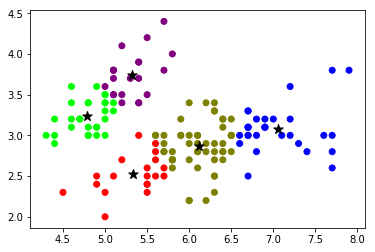

In [101]:
centroids, cluster_ids = kmeans(X,5)
plt.scatter(X[:, 0], X[:, 1], c=cluster_ids, cmap=plt.cm.brg)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=100, marker = '*')
plt.show()


In [102]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Finding the number of clusters

Let's use the Wine dataset for this experiment. This is a classification dataset, and labels are provided.

(178, 13)


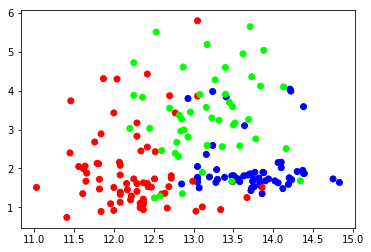

In [103]:
wine = datasets.load_wine()
X = wine.data
y = wine.target
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
plt.show()

We can use the labels provided to evaluate the clustering performance. Use the function below to compute the cluster purity for k taking values $\{1,2,3,5,7,10,15,18,20\}$, and plot the purity against the number of clusters.

In [104]:
def plot_knee_purities(X,y):
    
    np.random.seed(42)
    purities = []
    k_values = [1,2,3,5,7,10,15,18,20]
    for k in k_values:
        centroids, y_pred = kmeans(X,k)
        purities.append(purity_score(y,y_pred))
    plt.plot(k_values,purities)
    plt.show()
    return purities

def purity_score(y_true, y_pred):
    k = np.unique(y_pred).shape[0]
    counts = metrics.cluster.contingency_matrix(y_true, y_pred)
    purity = (1/k)*np.sum(np.amax(counts, axis=0)/np.sum(counts, axis=0))
    return purity

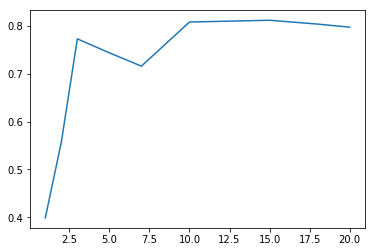

In [111]:
purities = plot_knee_purities(X,y)

In [75]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# PCA

Let us work with the following data. We will implement PCA and perform dimensionality reduction.

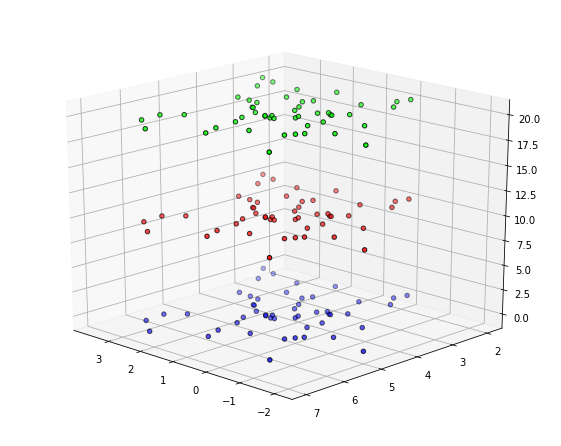

In [76]:
def gen_3d_data():
    X0, y0 = make_blobs(n_samples=50, centers=1, random_state=0, cluster_std=1.2)
    X0 = np.append(X0, np.full(X0.shape[0],0).reshape(-1,1), axis=1)
    X1, y1 = make_blobs(n_samples=50, centers=1, random_state=0, cluster_std=1.2)
    y1[y1==0]=1
    X1 = np.append(X1, np.full(X1.shape[0],10).reshape(-1,1), axis=1)
    X2, y2 = make_blobs(n_samples=50, centers=1, random_state=0, cluster_std=1.2)
    y2[y2==0]=2
    X2 = np.append(X2, np.full(X2.shape[0],20).reshape(-1,1), axis=1)

    X = np.concatenate((X0,X1,X2))
    y = np.concatenate((y0,y1,y2))
    return X,y

X,y = gen_3d_data()

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=134)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap = plt.cm.brg, edgecolor='k')

plt.show()

We will compute the scatter matrix for the data. First, the data has to be mean-centred.

$X \leftarrow X - \mu$

where $\mu$ is the sample mean. Then, we can compute the scatter matrix as

$S = \sum_{i=1}^N x_jx_j^T$

where $N$ is the number of samples. $S$ should be an $m \times m$ matrix, where $m$ is the number of features in the data.

Implement the function below to compute the scatter matrix.

In [77]:
def compute_scatter_matrix(X):
    X_Cloned = X - sum(X[:,])/len(X)
    S = np.zeros((X.shape[1],X.shape[1]))
    for x in X_Cloned:
        S += (x.reshape(X.shape[1],1)).dot((x.reshape(X.shape[1],1)).T)
    return S
compute_scatter_matrix(X)

array([[ 2.30867252e+02, -2.11135885e+01, -1.77635684e-15],
       [-2.11135885e+01,  2.17472999e+02, -3.55271368e-15],
       [-1.77635684e-15, -3.55271368e-15,  1.00000000e+04]])

In [78]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now we can implement the PCA algorithm as follows.

- Obtain the scatter matrix for the data

- Obtain the eigenvalues and eigenvectors of the scatter matrix

- Sort the eigenvalues in descending order

- Take the eigenvectors corresponding to the top k eigenvalues, and return these as principal components

- Project the data onto the lower dimensional space by taking $P = Xv$, where $X$ is the data matrix of size $N \times m$, and $v$ is a matrix of size $m \times k$ that gives the $k$ eigenvalues. $P$ should be a matrix of size $N \times k$, which gives the k-dimensional representation of all the input points.

In [79]:
from scipy import linalg as LA
def principal_components_analysis(X, k):
    scatter_matrix = compute_scatter_matrix(X)
    #eigenvalues, eigenvectors = LA.eigh(scatter_matrix,eigvals=(X.shape[1]-k,X.shape[1]-1))
    #components = eigenvectors
    eigenValues, eigenVectors = LA.eig(scatter_matrix)
    idx = eigenValues.argsort()[::-1][0:k]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    components = eigenVectors
    projected_data = X.dot(components)
    return components, projected_data

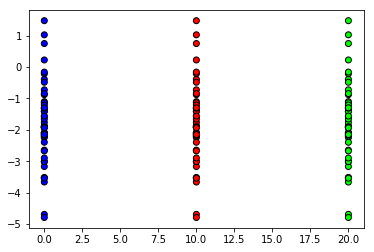

In [80]:
X,y = gen_3d_data()
components, P = principal_components_analysis(X, k=2)
plt.scatter(P[:, 0], P[:, 1], c=y, edgecolor='k', cmap=plt.cm.brg)
plt.show()

Try using your function on the Iris dataset, projecting it down to 2D and plotting the results.

In [84]:
iris = datasets.load_iris()
X = iris.data

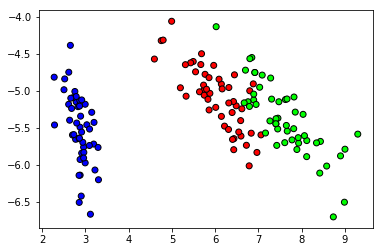

In [85]:
components, P = principal_components_analysis(X, k=2)
plt.scatter(P[:, 0], P[:, 1], c=y, edgecolor='k', cmap=plt.cm.brg)
plt.show()

In [87]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Eigenfaces

Let's continue our exploration of PCA, and work with the Olivetti Face Dataset.

(400, 4096)


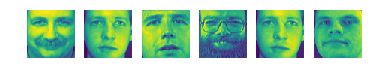

In [88]:
dataset = datasets.fetch_olivetti_faces()
X = dataset.data
print(X.shape)
N = X.shape[0]
# Plotting a few images from the dataset
for index, image in enumerate(X[np.random.choice(N, 6)]):
    plt.subplot(1, 6, index+1)
    plt.axis('off')
    plt.imshow(image.reshape(64,64))

The original images are $64 \times 64$, or in 4096 dimensions. Use PCA and obtain a 10-dimensional representation of the data. Your scatter matrix will be of size $4096 \times 4096$, so this may take some time to compute.

In [89]:
###
### YOUR CODE HERE
###


Now try plotting the first principal component, which would be the eigenvector corresponding to the largest eigenvalue.

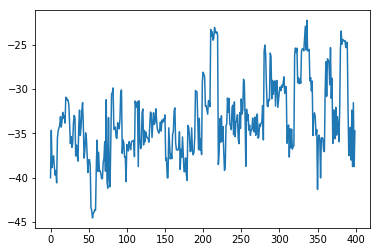

In [90]:
from sklearn.decomposition import PCA
components, P = principal_components_analysis(X, k=10)
plt.plot(P[:, 0])
plt.show()

Does it look somewhat like a face?


The principal components give us prototypes for faces and facial features: combining these prototypes gives us the various different kinds of faces in the dataset.


In fact, we can reconstruct the face images using the principal components and the projected data. For reference, here is a plot of the first image in the dataset.

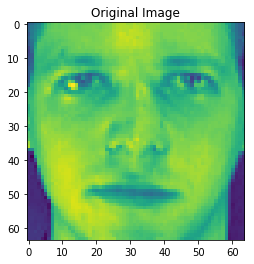

In [718]:
plt.imshow(X[0].reshape(64,64))
plt.title("Original Image")
plt.show()

The reconstruction can be computed using the project data matrix $P$ and the components $v$, by taking $X_{reconst} = Pv^T$. Here, $P$ is of size $N \times k$ and $v$ is of size $m \times k$, so the reconstruction should be of size $N \times m$ - same as the original data matrix.

In [719]:
def reconstruct(projection, components):
    reconstruction = projection.dot(components.T)
    return reconstruction

Plot the reconstructed image for the same face as before (first image in the dataset).

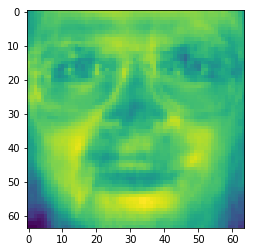

In [720]:
Xreconst = reconstruct(P, components)
plt.imshow(Xreconst[0].reshape(64,64))
plt.show()

In [453]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


You should be able to see a face with some resemblance to the original image, but a few facial features not perfectly reproduced - after all, we have reduced the dimensionality down from 4096 to just 10.

Let's repeat the same experiment. Use PCA to obtain 100 components, and plot the reconstruction for the same image as above.

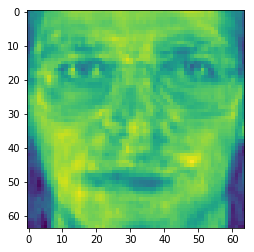

In [454]:
components, P = principal_components_analysis(X, k=100)
Xreconst = reconstruct(P, components)
plt.imshow(Xreconst[0].reshape(64,64))
plt.show()

In [455]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Do you see the quality of the reconstruction improve? As we add more components, the faithfulness to the original image increases. At 4096 components, we recover the exact image. However, these experiments suggest that a lower number of components is quite sufficient to recover the salient aspects of the image.


Repeat the same experiment as above, taking 500 components.

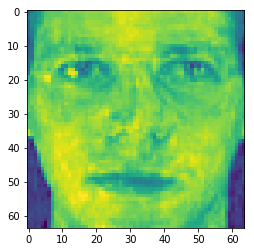

In [456]:
components, P = principal_components_analysis(X, k=500)
Xreconst = reconstruct(P, components)
plt.imshow(Xreconst[0].reshape(64,64))
plt.show()

The original face should be clear by now.

In [457]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


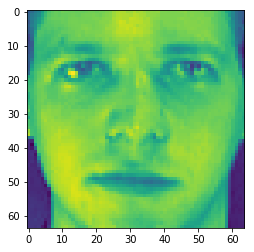

In [458]:
components, P = principal_components_analysis(X, k=4096)
Xreconst = reconstruct(P, components)
plt.imshow(Xreconst[0].reshape(64,64))
plt.show()

In [112]:
x = {1:2,2:5,6:10}
for k in x:
    print(k)

1
2
6


In [ ]:
# Kmeans Algorithm
# Input: X - data, k - number of clusters
# Output: centroids - list of k vectors each represent a point, 
        # cluster_ids - list of indexes of centroids to which datapoint belongs to in the same order

def kMeans(X, k):
    ###
    ### YOUR CODE HERE
    ###
    return centroids, cluster_ids